# Hello world

This Hello world example creates a simple quantum program and runs it on a quantum system. Begin with following the [Install and set up](install) instructions if you haven't already, including the steps to [Set up to use IBM Quantum Platform](setup-channel#set-up-to-use-ibm-quantum-platform).

We recommend that you use the [Jupyter](https://jupyter.org/install) development environment to interact with quantum computers. Be sure to install the recommended extra visualization support (`pip install qiskit[visualization]`), and note that zsh users need to put `'qiskit[visualization]'` in single quotes.

To learn about quantum computing in general, check out the [Basics of quantum information course](https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information) in IBM Quantum Learning.

The four steps to writing a quantum program are

1.  Map the problem to a quantum-native format

2.  Optimize the circuits and operators

3.  Execute using a quantum primitive function

4.  Analyze the results

## Step 1. Map the problem to a quantum-native format


In a quantum program, *quantum circuits* are the native format in which to represent quantum instructions, and *operators* represent the observables to be measured. When creating a circuit, you'll usually create a new [`QuantumCircuit`](/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) object, then add instructions to it in sequence.


The following code cell creates a circuit that produces a *Bell state,* which is a specific two-qubit entangled state.

<Admonition type="note" title="Note: bit ordering">
  Qiskit uses the LSb 0 bit numbering where the $n^{th}$ digit has value $1 \ll n$ or $2^n$. Because we usually write numbers on paper with the most significant digits to the left and the least significant digits to the right (in the Hindu-Arabic system used in most of the world), this has the consequence that the bits are labeled with indices increasing <b>from right to left</b>. This LSb 0 convention makes mathematics easier and is the most commonly used for modern digital electronics, although the opposite convention MSb 0 is also found in some domains. Converting the $i^{th}$ index between LSb 0 and MSb 0 conventions on an $n$-bit register is as simple as $i \rightarrow n-i-1$. This differs across authors and software packages, so be aware!
</Admonition>


/home/mark/anaconda3/envs/Qiskit/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


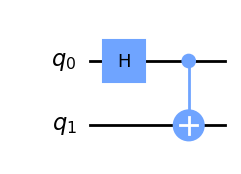

In [1]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

See [`QuantumCircuit`](/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) in the documentation for all available operations.


The following code cell uses the `quantum_info` package to create the two-qubit Pauli operator Z on qubit 1 and Z on qubit 2. If the state is entangled, then the correlation between qubit 1 and qubit 2 is one.


In [2]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

## Step 2. Optimize the circuits and operators

For this example, the circuit the operators are simple, so no optimizations are needed.


## Step 3. Execute using a quantum primitive function

Quantum computers can produce random results, so you'll often want to collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable using the `Estimator` class. `Estimator` is one of our two [primitives](../run/primitives-get-started); the other is `Sampler`, which can be used to get data from a quantum computer.


In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

service = QiskitRuntimeService()

# Run on the least-busy backend you have access to
# backend = service.least_busy(simulator=False, operational=True)
backend = service.get_backend("ibmq_qasm_simulator")

options = Options()
options.resilience_level = 1
options.optimization_level = 3

# Create an Estimator object
estimator = Estimator(backend, options=options)

# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)

# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([5.59105431e-03, 7.98722045e-03, 1.43769968e-02, 7.98722045e-04,
       1.00000000e+00, 1.00000000e+00]), metadata=[{'variance': 0.999968740111668, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9999362043095265, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9997933019628658, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9999993620430953, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.0, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.0, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])

<Admonition type="note" title="Queue times">
  Queue times on real devices may vary. If you would like to get a faster result, replace the `backend =` line with the following instead:

  ```python



  # Run on a simulator



  backend = service.get_backend("ibmq_qasm_simulator")



  ```
</Admonition>


The `values` property is a list of expectation values for each of the observables we provided.


## Step 4. Analyze the results


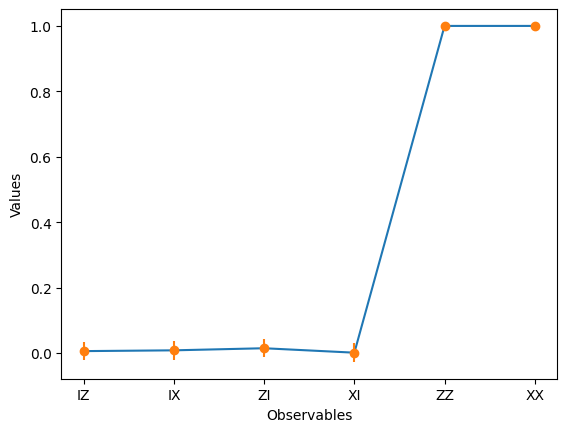

In [4]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

Here we see that for qubits 0 and 1, the independent values of both X and Z are zero, while the correlations are one. This is a hallmark of quantum entanglement.
